<br>
<p style="text-align:left;"><font size='15'><b> Moore's Law  </b></font></p>
<p style="text-align:left;"><font size='6'><b> With a Hand-Crafted Linear Regression </b></font></p>

<h4 align='left'>  Prepared by Radu Stoian

<br> 

[Link to Data Source (Wikipedia)](https://en.wikipedia.org/wiki/Transistor_count)

---

# <a name="intro"></a><font color='#347B98'> 0 - Purpose of Notebook</font> <font size='3'></font>


#### Create a linear regression model to describe the relationship between time (in years) and the number of transistors on integrated circuits

# <a name="intro"></a><font color='#347B98'> 1 - Setup and Create Linear Regression Class</font> <font size='3'></font>

## $\Delta$ 1.1 - Import Packages

In [22]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## $\Delta$ 1.2 - One-Feature Simple Linear Regression Class

In [97]:
class SimpleLinearRegression:
    
    def __init__(self):
        self.a = None
        self.b = None
        
    def __repr__(self):
        return "SimpleLinearRegression(" + str(self.a) + "," + str(self.b) + ")"
        
    def fit(self, x: np.ndarray, y: np.ndarray) -> SimpleLinearRegression:
        denom = x.dot(x) - x.mean() * x.sum()
        a = ( x.dot(y) - y.mean() * x.sum() ) / denom
        b = ( y.mean() * x.dot(x) - x.mean() * x.dot(y) ) / denom
        self.a = a
        self.b = b
        return self
        
    def predict(self, x: np.ndarray) -> float:
        if self.a == None or self.b == None:
            raise ValueError("linear regression instance must be fit before this operation can be carried out")
        else:
            return x.dot(self.a) + self.b
        
    def get_r2(self, x: np.ndarray, y: np.ndarray) -> float:
        yHat = self.predict(x)
        residuals = y - yHat
        diffs = y - y.mean()
        return 1 - residuals.dot(residuals) / diffs.dot(diffs)
    
    def plot_reg(self, x: np.ndarray, y: np.ndarray) -> None:
        plt.scatter(x, y)
        plt.plot(x, self.predict(x), "r")
        plt.show()

## $\Delta$ 1.3 - Test Class on Made-Up Data

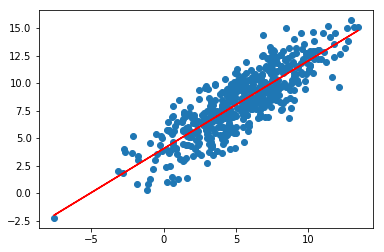

In [98]:
# creating a dataset of two strongly correlated correlated variables
M = np.random.multivariate_normal([5, 8], [[10, 8], [8, 9]], 500)

x, y = M[:, 0], M[:, 1]

# seeing if our line of best fit holds up
reg_test = SimpleLinearRegression().fit(x, y)

# seems to deliver!
reg_test.plot_reg(x, y)

# <a name="intro"></a><font color='#347B98'> 2 - Validate Moore's Law Using Data From Wikipedia</font> <font size='3'></font>

## $\Delta$ 2.1 - Pull Dataset and Examine

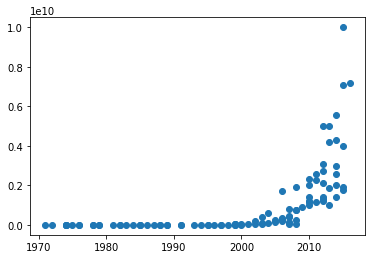

In [81]:
# Pull
X = []
Y = []

non_decimal = re.compile(r'[^\d]+')

for line in open("moore.csv"):
    r = line.split("\t")
    
    x = int(non_decimal.sub("", r[2].split("[")[0]))
    y = int(non_decimal.sub("", r[1].split("[")[0]))
    X.append(x)
    Y.append(y)
    
X = np.array(X)
Y = np.array(Y)

#  The number of transistors on integrated circuits doubles every 2 years, meaning that growth is exponential
plt.scatter(X, Y)
plt.show()

## $\Delta$ 2.2 - Take Natural Logarithm of X and Y; Use Transformed Variables in Regression

 
    r2 is: 0.9527058618118958, a is: 700.2775834841899, b is: -5305.639918269747
    



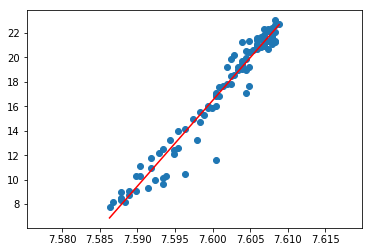

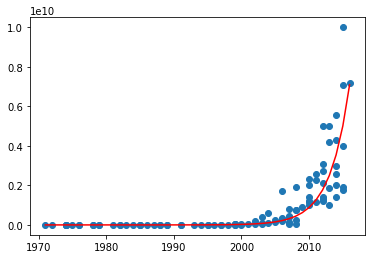

In [104]:
# take log arrays
log_X, log_Y = [np.log(v) for v in [X, Y]]


moores_reg = SimpleLinearRegression().fit(log_X, log_Y)

print(""" 
    r2 is: {0}, a is: {1}, b is: {2}
    
""".format(moores_reg.get_r2(log_X, log_Y), moores_reg.a, moores_reg.b))

# there is a strong linear relationship between log_X and log_Y
moores_reg.plot_reg(log_X, log_Y)

# converting everything back to normal scale and plotting
plt.scatter(X, Y)
plt.plot(X, np.exp(moores_reg.predict(log_X)), "r")
plt.show()

## $\Delta$ 2.3 - Predict the Number of Transitors for the Year 2050

In [109]:
# about 1745388! 
moores_reg.predict(np.array([2500]))[0]

1745388.3187922048